Average Horizontal Intersections: 8
Average Vertical Intersections: 12
Average D1 Intersections: 14
Average D2 Intersectiosn: 14


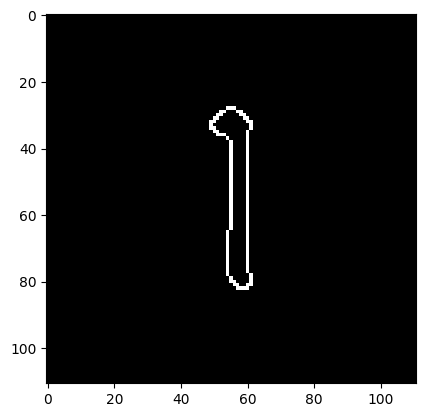

In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math


def center_image(img1):
    hh = img1.shape[0]
    ww = img1.shape[1]


    contours = cv2.findContours(img1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)

    startx = (ww - w)//2
    starty = (hh - h)//2
    result = np.zeros_like(img1)
    result[starty:starty+h,startx:startx+w] = img1  [y:y+h,x:x+w]
    return result



def calculate_intersections(path):
    img1 = cv2.imread(path)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img1 = cv2.threshold(img1, 50, 255, cv2.THRESH_BINARY)

    img1 = center_image(img1[1])
    plt.imshow(img1, cmap='gray')

    x = img1.shape[0]
    y = img1.shape[1]

    ## To draw horizontal lines

    horizotal_lines = np.zeros_like(img1, dtype = np.uint8)

    horizotal_lines = cv2.line(horizotal_lines, (0, 28), (x, 28), (255, 255, 255), 1)
    horizotal_lines = cv2.line(horizotal_lines, (0, 42), (x, 42), (255, 255, 255), 1)
    horizotal_lines = cv2.line(horizotal_lines, (0, 55), (x, 55), (255, 255, 255), 1)
    horizotal_lines = cv2.line(horizotal_lines, (0, 69), (x, 69), (255, 255, 255), 1)
    horizotal_lines = cv2.line(horizotal_lines, (0, 82), (x, 82), (255, 255, 255), 1)

    ## To draw vertical lines

    vertical_lines = np.zeros_like(img1, dtype = np.uint8)

    vertical_lines = cv2.line(vertical_lines, (28, 0), (28, y), (255, 255, 255), 1)
    vertical_lines = cv2.line(vertical_lines, (42, 0), (42, y), (255, 255, 255), 1)
    vertical_lines = cv2.line(vertical_lines, (55, 0), (55, y), (255, 255, 255), 1)
    vertical_lines = cv2.line(vertical_lines, (69, 0), (69, y), (255, 255, 255), 1)
    vertical_lines = cv2.line(vertical_lines, (82, 0), (82, y), (255, 255, 255), 1)

    d1 = np.zeros_like(img1, dtype = np.uint8)
    d2 = np.zeros_like(img1, dtype = np.uint8)

    d1 = cv2.line(vertical_lines, (0, 0), (x, y), (255, 255, 255), 1)
    d2 = cv2.line(vertical_lines, (x, 0), (0, y), (255, 255, 255), 1)

    ## Get Intersection points
    horizontal_intersections = horizotal_lines & img1
    vertical_intersections = vertical_lines & img1
    d1_intersections = d1 & img1
    d2_intersections = d2 & img1

    horizontal_count = 0
    vertical_count = 0
    d1_intersections_count = 0
    d2_intersections_count = 0

    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if horizontal_intersections[i][j] == 255:
                horizontal_count += 1
            if vertical_intersections[i][j] == 255:
                vertical_count += 1
            if d1_intersections[i][j] == 255:
                d1_intersections_count += 1
            if d2_intersections[i][j] == 255:
                d2_intersections_count += 1
    return horizontal_count, vertical_count, d1_intersections_count, d2_intersections_count

current_num = 1

num1h, num1v, d11, d21 = calculate_intersections(f"NumberData/Number{current_num}/num1.jpg")
num2h, num2v, d12, d22 = calculate_intersections(f"NumberData/Number{current_num}/num2.jpg")
num4h, num4v, d14,d24 = calculate_intersections(f"NumberData/Number{current_num}/num4.jpg")
num6h, num6v, d16, d26 = calculate_intersections(f"NumberData/Number{current_num}/num6.jpg")
num9h, num9v, d19, d29 = calculate_intersections(f"NumberData/Number{current_num}/num9.jpg")
num11h, num11v, d111, d211 = calculate_intersections(f"NumberData/Number{current_num}/num11.jpg")
num14h, num14v, d114, d214 = calculate_intersections(f"NumberData/Number{current_num}/num14.jpg")

total_horizontal =    num2h  +num6h+ num9h + num11h + num14h 
total_vertical =   num2v  + num9v + num11v + num6v + num14h
total_d1 =  d12 +   d16 + d19 + d111 + d114
total_d2 =  d22   + d26 + d29 + d211 + d214

avg_horizontal = total_horizontal // 7
avg_vertical = total_vertical // 7
avg_d1 = total_d1 // 7
avg_d2 = total_d2 // 7

print(f"Average Horizontal Intersections: {avg_horizontal}")
print(f"Average Vertical Intersections: {avg_vertical}")
print(f"Average D1 Intersections: {avg_d1}")
print(f"Average D2 Intersectiosn: {avg_d2}")

###

# 1: 14
# 2:
# 3: 28
# 4:
# 5:
# 6:
# 7:
# 8:
# 9:

###


###
# El a5eera please

# 1: 3, 8
# 2: 22, 19
# 3: 13, 17 done
# 4: 11, 10 lesa
# 5: 18, 16
# 6: 30, 27
# 7: 16, 16
# 8: 63, 65
# 9: 34, 31
###

